In [1]:
# eq of a hyperbola
var('x', 'cx', 'y', 'a', 'b')
eq = ((x-cx)/a)**2 - (y/b)**2 == 1
show(eq)

(cx - x)^2/a^2 - y^2/b^2 == 1

0.4482970028793733*(x - 0.395430325635937)^2 - 0.204137089998530*y^2 == 1

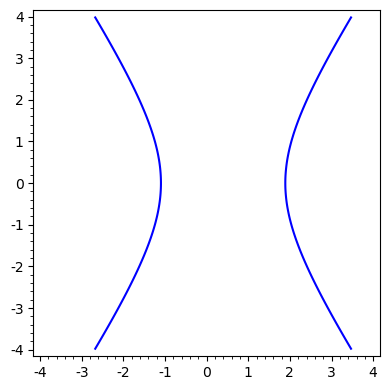

In [2]:
# pick a random hyperbola
import random
a_min = 1
a_max = 2
cx_max = 1
ab_ratio = 1 + (random.random() - .5) * 1
a_true = random.random() * (a_max - a_min) + a_min
b_true = a_true * ab_ratio
cx_true = (random.random() - .5) * 2 * cx_max
eq1 = eq(a=a_true, b=b_true, cx=cx_true)
show(eq1)
def plot_h(h, color='blue', x_min=-2*a_max, x_max=2*a_max):
    return implicit_plot(h, (x_min, x_max), (x_min,x_max), color=color)
true_plot = plot_h(eq1)
true_plot

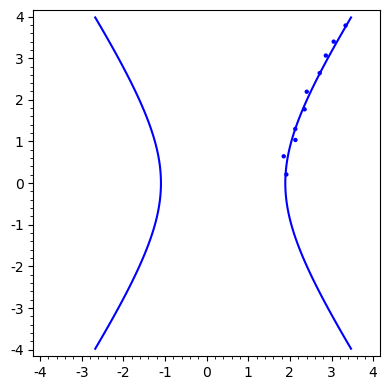

In [3]:
# sample some points from the hyperbola, with x>0, y>0, and add noise
num_points = 10
y_max = a_max * 2

x_of_y = solve(eq1, x)[1]
ys = [(y0+.5) * y_max/num_points for y0 in range(num_points)]
xs = [x_of_y(y=y0).right() for y0 in ys]

# apply noise
dx = a_max/20
dy = a_max/20
xs = [x0 + (random.random() - .5) * 2 * dx for x0 in xs]
ys = [y0 + (random.random() - .5) * 2 * dy for y0 in ys]

true_plot + point(list(zip(xs, ys)))

1.91440627529275 0.206527716394427
1.85087569724010 0.643316862927832

NaN result encountered.
2.13218490865367 1.03551093362351
2.12898788735315 1.30044066884460
2.35270298313908 1.77209266246561
2.40410372797523 2.19474431530132
2.71544941355797 2.64147448539954
2.86217385846779 3.06331125429841
3.05148981761189 3.39731154906812
3.33651084184086 3.78453394194887


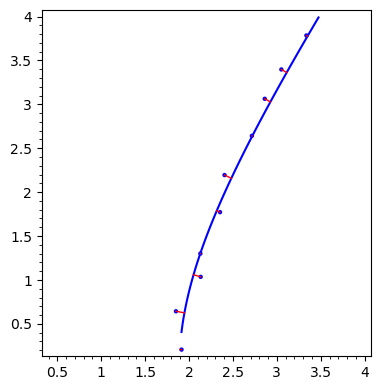

In [4]:
# shortest distance hyperbola to point
def closest_point(h, px, py):
    y_of_x = solve(h, y)[0 if py < 0 else 1]
    tangent = diff(y_of_x, x).right()
    perp = -1/tangent
    eq_perp = y == perp * (x - px) + py
    eq_root = y_of_x.right() - eq_perp.right()
    x0 = find_root(eq_root, -a_max*10, a_max*10, xtol=1e-9, rtol=1e-9)
    y0 = y_of_x(x=x0).right()
    return (x0, y0)

G = plot_h(eq1, x_min=cx_true) + point(list(zip(xs, ys)))
for (x0, y0) in zip(xs, ys):
    print(x0, y0)
    G += line([(x0, y0), closest_point(eq1, x0, y0)], rgbcolor=(1,0,0))
G

In [5]:
# optimize to fit a hyperbola to the samples

def dist2(a, b):
    return ((a[0] - b[0]) ** 2 + (a[1] - b[1]) ** 2).n()

def cost(abc):
    a, b, cx = abc
    h = eq(a=a, b=b, cx=cx)
    return sum([dist2(p, closest_point(h, p[0], p[1])) for p in zip(xs, ys)])

from scipy.optimize import minimize
abc = [a_max/2, a_max/2, 0]
res = minimize(cost, abc, method='nelder-mead')
print(res)


NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.



NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.
 final_simplex: (array([[

	Correct   	Measured  	Error     
a	1.494    	1.902    	0.409
b	2.213    	2.662    	0.449
cx	0.395    	0.000    	0.395


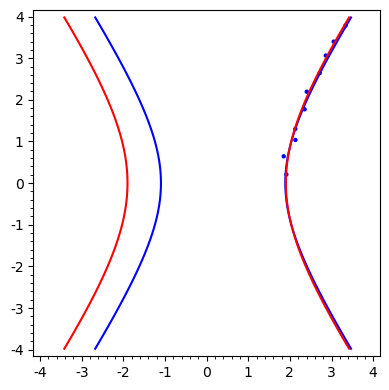

In [6]:
a_test, b_test, cx_test = res.x
h = eq(a=a_test, b=b_test, cx=cx_test)
print("\t{:10s}\t{:10s}\t{:10s}".format("Correct", "Measured", "Error"))
print("a\t{:.3f}    \t{:.3f}    \t{:.3f}".format(a_true, a_test, abs(a_true - a_test)))
print("b\t{:.3f}    \t{:.3f}    \t{:.3f}".format(float(b_true), b_test, abs(b_true - b_test)))
print("cx\t{:.3f}    \t{:.3f}    \t{:.3f}".format(float(cx_true), cx_test, abs(cx_true - cx_test)))
true_plot + point(list(zip(xs, ys))) + plot_h(h, 'red')